# White-wine data reading and cleaning

In [1024]:
#Import and read the white-wine file which is in CSV format using pandas.
import pandas as pd
df=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\MSDA\SEM2\MACHINE_LEARNING\Project\datasets\winequality-white.csv",sep=';',header='infer')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [1025]:
#checking and renaming headers into single value.
df=df.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid','free sulfur dioxide': 'free_sulfur_dioxide','residual sugar': 'residual_sugar','total sulfur dioxide': 'total_sulfur_dioxide'})
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [1026]:
#checking for categorical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [1027]:
#Checking and removal of duplicates, if any present.
print("The number of non-distinct data is :",df.count())
df=df.drop_duplicates()
print("After dropping the duplicates, the count of the dictinct data is:",df.count()) 

The number of non-distinct data is : fixed_acidity           4898
volatile_acidity        4898
citric_acid             4898
residual_sugar          4898
chlorides               4898
free_sulfur_dioxide     4898
total_sulfur_dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64
After dropping the duplicates, the count of the dictinct data is: fixed_acidity           3961
volatile_acidity        3961
citric_acid             3961
residual_sugar          3961
chlorides               3961
free_sulfur_dioxide     3961
total_sulfur_dioxide    3961
density                 3961
pH                      3961
sulphates               3961
alcohol                 3961
quality                 3961
dtype: int64


In [1028]:
#checking for nulls or missing values.
df.isnull()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [1029]:
#Create a user defined function to convert the interger values of 'quality' column into binary values such as 0 and 1.
import numpy as np
df['quality'] = np.where(df['quality']>=6, 1, 0)

C:\Users\varsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1030]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [1031]:
#Seperating X and y values and storing in different variables.
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=df['quality']

In [1032]:
#Standardize the feature-vector values.
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
X = sclr.fit_transform(X)
X

array([[ 0.18535197, -0.10188873,  0.20965146, ..., -1.28992816,
        -0.35548818, -1.47039574],
       [-0.6222624 ,  0.18817926,  0.04629365, ...,  0.68992438,
        -0.00309159, -0.89517431],
       [ 1.45446025, -0.0051994 ,  0.53636707, ...,  0.42594404,
        -0.44358733, -0.40212736],
       ...,
       [-0.39151544, -0.39195672, -1.17888992, ..., -1.35592325,
        -0.26738904, -0.9773488 ],
       [-1.54525024,  0.09148993, -0.28042197, ...,  0.95390472,
        -0.97218223,  1.81658387],
       [-0.96838284, -0.6820247 ,  0.37300927, ...,  0.42594404,
        -1.50077712,  0.99483897]])

In [1033]:
#split the data into training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print("The number of rows and columns in the training dataset post split is:",X_train.shape)
print("The number of rows and columns in the training dataset post split is:",y_train.shape)
print("The number of rows and columns in the test dataset post split is:",X_test.shape)
print("The number of rows and columns in the tes dataset post split is:",y_test.shape)

The number of rows and columns in the training dataset post split is: (2772, 11)
The number of rows and columns in the training dataset post split is: (2772,)
The number of rows and columns in the test dataset post split is: (1189, 11)
The number of rows and columns in the tes dataset post split is: (1189,)


# White-wine Regression 

In [1034]:
#create a decision tree regression model using the training dataset.
from sklearn import tree
decisionTreeRegressor = tree.DecisionTreeRegressor()
DTRegModel = decisionTreeRegressor.fit(X_train, y_train)
DTRegModel

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1035]:
#Test the model with the test dataset for predictions (without the labels).
DTReg_predictions=DTRegModel.predict(X_test)
DTReg_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [1036]:
#hyper parameter tuning for a better accuracy of our decision tree model.
parameter_dist={'criterion':['mse','mae'], 
                'max_depth':[1,2,3,4,5,6,7,None]}

In [1037]:
#one of the method used for fine tuning the algorithm.
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(decisionTreeRegressor,param_grid=parameter_dist,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
             pre_dispatch='2*n_job

In [1038]:
#determine best parameter values of a decision tree.
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1039]:
#determine the best accuracy score.
print(f'The score is: {round((grid.best_score_*100),2)}%')

The score is: 17.97%


In [1040]:
#determine the best parameters for fine tuning.
grid.best_params_

{'criterion': 'mse', 'max_depth': 3}

In [1041]:
#hyper tuning the parameters and training the model.
decisionTreeRegressor = tree.DecisionTreeRegressor(criterion= 'mse', max_depth= 3)
DTRegModel = decisionTreeRegressor.fit(X_train, y_train)
DTRegModel

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1042]:
#Test the model with the test dataset for predictions (without the labels).
DTReg_predictions=DTRegModel.predict(X_test)
DTReg_predictions

array([0.56108597, 0.56108597, 0.83551674, ..., 0.56108597, 0.78021978,
       0.33992806])

In [1043]:
#Check mean absolute error value.
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, DTReg_predictions)
print(f'The mean absolute error of decision tree regression for white-wine quality prediction is {round((MAE*100),2)}%')


The mean absolute error of decision tree regression for white-wine quality prediction is 34.47%


In [1044]:
#check the mean squared error value.
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, DTReg_predictions,squared=False)
print(f'The mean squared error of decision tree regression for white-wine quality prediction is {round((MSE*100),2)}%')


The mean squared error of decision tree regression for white-wine quality prediction is 41.83%


In [1045]:
#Check the root mean squared error (RMSE) value.
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test, DTReg_predictions,squared=True)
print(f'The root mean squared error of decision tree regression for white-wine quality prediction is {round((RMSE*100),2)}%')

The root mean squared error of decision tree regression for white-wine quality prediction is 17.5%


In [1046]:
#Check the regression score function value (r2-score).
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, DTReg_predictions)
print(f'The regression score function value of decision tree regression for white-wine quality prediction is {round((r2_score*100),2)}%')

The regression score function value of decision tree regression for white-wine quality prediction is 22.47%


[Text(418.5, 475.65000000000003, 'X[10] <= 0.132\nmse = 0.224\nsamples = 2772\nvalue = 0.661'),
 Text(209.25, 339.75, 'X[1] <= 0.067\nmse = 0.249\nsamples = 1619\nvalue = 0.523'),
 Text(104.625, 203.85000000000002, 'X[1] <= -0.706\nmse = 0.231\nsamples = 1027\nvalue = 0.639'),
 Text(52.3125, 67.94999999999999, 'mse = 0.171\nsamples = 364\nvalue = 0.78'),
 Text(156.9375, 67.94999999999999, 'mse = 0.246\nsamples = 663\nvalue = 0.561'),
 Text(313.875, 203.85000000000002, 'X[6] <= -1.129\nmse = 0.219\nsamples = 592\nvalue = 0.323'),
 Text(261.5625, 67.94999999999999, 'mse = 0.052\nsamples = 36\nvalue = 0.056'),
 Text(366.1875, 67.94999999999999, 'mse = 0.224\nsamples = 556\nvalue = 0.34'),
 Text(627.75, 339.75, 'X[5] <= -1.359\nmse = 0.124\nsamples = 1153\nvalue = 0.855'),
 Text(523.125, 203.85000000000002, 'X[10] <= 0.954\nmse = 0.25\nsamples = 77\nvalue = 0.481'),
 Text(470.8125, 67.94999999999999, 'mse = 0.204\nsamples = 42\nvalue = 0.286'),
 Text(575.4375, 67.94999999999999, 'mse = 0.2

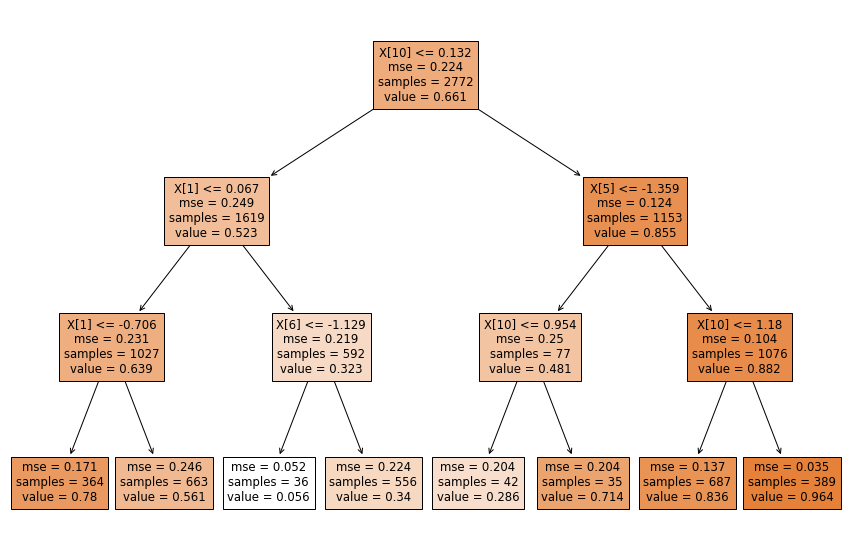

In [1047]:
#plot the decision tree for white-wine dataset
plt.figure(figsize=(15,10))
tree.plot_tree(decisionTreeRegressor,filled=True)

In [1048]:
#Division of tree shown in the form of text.
print(tree.export_text(decisionTreeRegressor))

|--- feature_10 <= 0.13
|   |--- feature_1 <= 0.07
|   |   |--- feature_1 <= -0.71
|   |   |   |--- value: [0.78]
|   |   |--- feature_1 >  -0.71
|   |   |   |--- value: [0.56]
|   |--- feature_1 >  0.07
|   |   |--- feature_6 <= -1.13
|   |   |   |--- value: [0.06]
|   |   |--- feature_6 >  -1.13
|   |   |   |--- value: [0.34]
|--- feature_10 >  0.13
|   |--- feature_5 <= -1.36
|   |   |--- feature_10 <= 0.95
|   |   |   |--- value: [0.29]
|   |   |--- feature_10 >  0.95
|   |   |   |--- value: [0.71]
|   |--- feature_5 >  -1.36
|   |   |--- feature_10 <= 1.18
|   |   |   |--- value: [0.84]
|   |   |--- feature_10 >  1.18
|   |   |   |--- value: [0.96]



# White-wine Classification 

In [1049]:
#create a decision tree classification model using the training dataset.
decisionTreeClassifier=tree.DecisionTreeClassifier()
DTClsModel=decisionTreeClassifier.fit(X_train,y_train)
DTClsModel

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1050]:
#Test the model with the test dataset for predictions(without the labels).
DTClass_predictions=DTClsModel.predict(X_test)
DTClass_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [1051]:
#check the probability of predicted labels.
DTClsModel.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1053]:
#Check the accuracy of decision tree classifier before fine tuning.
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, DTClass_predictions)
print(f'The accuracy  of decision tree classification for white-wine quality prediction is {round((accuracy_score*100),2)}%')


The accuracy  of decision tree classification for white-wine quality prediction is 68.38%


In [1054]:
#hyper parameter tuning for a better accuracy of our decision tree model.
parameter_dist={'criterion':['gini','entropy'], 
                'max_depth':[1,2,3,4,5,6,7,None]}


In [1055]:
#one of the method use for fine tuning the algorithm.
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(decisionTreeClassifier,param_grid=parameter_dist,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [1056]:
#determine best parameter values of a decision tree.
grid.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1057]:
#determine the best accuracy score.
print(f'The score is: {round((grid.best_score_*100),2)}%')

The score is: 73.49%


In [1058]:
#determine the best parameters for fine tuning.
grid.best_params_


{'criterion': 'entropy', 'max_depth': 3}

In [1059]:
#hyper tuning the parameters and training the model.
decisionTreeClassifier = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
DTClsModel = decisionTreeClassifier.fit(X_train, y_train)
DTClsModel


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1060]:
#Test the model with the test dataset for predictions (without the labels).
DTClass_predictions=DTClsModel.predict(X_test)
DTClass_predictions


array([1, 1, 1, ..., 1, 1, 0])

In [1061]:
#check the probability of predicted labels.
DTClsModel.predict_proba(X_test)

array([[0.43891403, 0.56108597],
       [0.43891403, 0.56108597],
       [0.16448326, 0.83551674],
       ...,
       [0.43891403, 0.56108597],
       [0.21978022, 0.78021978],
       [0.66007194, 0.33992806]])

In [1062]:
#Check the balanced accuracy score to determine the imbalanced data prediction.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score=balanced_accuracy_score(y_test, DTClass_predictions)
print(f'The balanced score accuracy  of decision tree regression for white-wine quality prediction is {round((balanced_accuracy_score*100),2)}%')

The balanced score accuracy  of decision tree regression for white-wine quality prediction is 68.14%


In [1063]:
#Check the accuracy of decision tree classifier post fine tuning.
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, DTClass_predictions)
print(f'The accuracy  of decision tree classification for white-wine quality prediction is {round((accuracy_score*100),2)}%')


The accuracy  of decision tree classification for white-wine quality prediction is 73.84%


In [1064]:
#Check the precision score of decision tree classifier.
from sklearn.metrics import precision_score
precision_score=precision_score(y_test, DTClass_predictions)
print(f'The precision score of decision tree classification for white-wine quality prediction is {round((precision_score*100),2)}%')

The precision score of decision tree classification for white-wine quality prediction is 76.68%


In [1065]:
#Check the recall score of decision tree classifier.
from sklearn.metrics import recall_score
recall_score=recall_score(y_test, DTClass_predictions)
print(f'The recall score  of decision tree classification for white-wine quality prediction is {round((recall_score*100),2)}%')

The recall score  of decision tree classification for white-wine quality prediction is 86.41%


In [1066]:
#Check the F1-score of decision tree classifier.
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, DTClass_predictions)
print(f'The f1-score of decision tree classification for white-wine quality prediction is {round((f1_score*100),2)}%')

The f1-score of decision tree classification for white-wine quality prediction is 81.25%


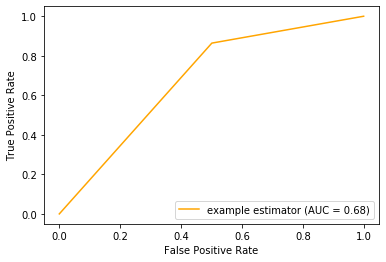

In [1067]:
# Plot the ROC curve.
import matplotlib.pyplot as plt  
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, DTClass_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot(color='orange')  
plt.show()   

In [1068]:
# Plot the precision-recall curve.
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, DTClass_predictions)
print('The Average precision-recall score is {0:0.2f}%'.format(((average_precision*100))))

The Average precision-recall score is 75.17%


Text(0.5, 1.0, 'The Precision-Recall curve: AP=75.17%')

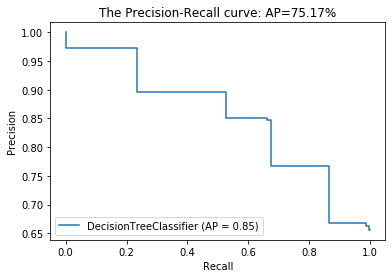

In [1069]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
display = plot_precision_recall_curve(DTClsModel, X_test, y_test)
display.ax_.set_title('The Precision-Recall curve: ''AP={0:0.2f}%'.format(((average_precision*100))))

In [1070]:
# determine Receiver Operating Characteristic Curve (ROC AUC) score.
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, DTClass_predictions)
print('The Receiver Operating Characteristic Curve (ROC AUC) score is {0:0.2f}%'.format(((roc_auc_score*100))))

The Receiver Operating Characteristic Curve (ROC AUC) score is 68.14%


In [1071]:
#determine the classifcation report.
from sklearn.metrics import classification_report
print(classification_report(y_test, DTClass_predictions))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       409
           1       0.77      0.86      0.81       780

    accuracy                           0.74      1189
   macro avg       0.71      0.68      0.69      1189
weighted avg       0.73      0.74      0.73      1189



In [1072]:
#build the confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, DTClass_predictions)

array([[204, 205],
       [106, 674]], dtype=int64)

[[204 205]
 [106 674]]


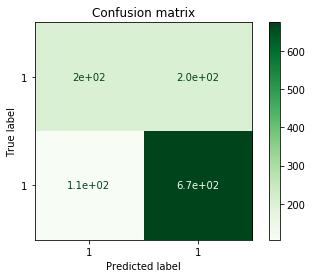

In [1073]:
#plot the confusion metrics.
display = plot_confusion_matrix(DTClsModel, X_test, y_test,display_labels=y,cmap=plt.cm.Greens)
display.ax_.set_title('Confusion matrix')
print(display.confusion_matrix)


[Text(418.5, 475.65000000000003, 'X[10] <= 0.132\nentropy = 0.924\nsamples = 2772\nvalue = [939, 1833]'),
 Text(209.25, 339.75, 'X[1] <= 0.067\nentropy = 0.998\nsamples = 1619\nvalue = [772, 847]'),
 Text(104.625, 203.85000000000002, 'X[1] <= -0.706\nentropy = 0.944\nsamples = 1027\nvalue = [371, 656]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.76\nsamples = 364\nvalue = [80, 284]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.989\nsamples = 663\nvalue = [291, 372]'),
 Text(313.875, 203.85000000000002, 'X[6] <= -1.129\nentropy = 0.907\nsamples = 592\nvalue = [401, 191]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.31\nsamples = 36\nvalue = [34, 2]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.925\nsamples = 556\nvalue = [367, 189]'),
 Text(627.75, 339.75, 'X[5] <= -1.359\nentropy = 0.597\nsamples = 1153\nvalue = [167, 986]'),
 Text(523.125, 203.85000000000002, 'X[10] <= 0.954\nentropy = 0.999\nsamples = 77\nvalue = [40, 37]'),
 Text(470.8125, 67.94999999999999, 'ent

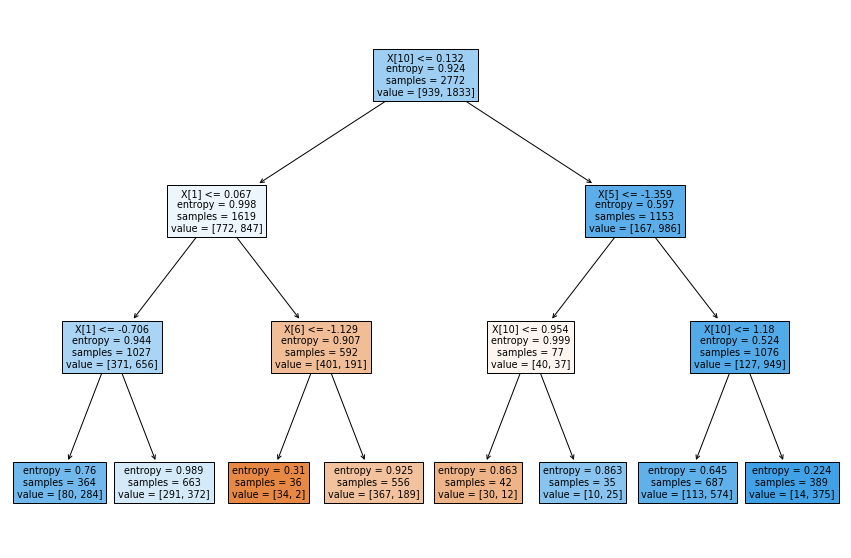

In [1074]:
#plot the decision tree for white-wine dataset.
plt.figure(figsize=(15,10))
tree.plot_tree(decisionTreeClassifier,filled=True)


In [1075]:
#Division of tree shown in the form of text.
print(tree.export_text(decisionTreeClassifier))


|--- feature_10 <= 0.13
|   |--- feature_1 <= 0.07
|   |   |--- feature_1 <= -0.71
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.71
|   |   |   |--- class: 1
|   |--- feature_1 >  0.07
|   |   |--- feature_6 <= -1.13
|   |   |   |--- class: 0
|   |   |--- feature_6 >  -1.13
|   |   |   |--- class: 0
|--- feature_10 >  0.13
|   |--- feature_5 <= -1.36
|   |   |--- feature_10 <= 0.95
|   |   |   |--- class: 0
|   |   |--- feature_10 >  0.95
|   |   |   |--- class: 1
|   |--- feature_5 >  -1.36
|   |   |--- feature_10 <= 1.18
|   |   |   |--- class: 1
|   |   |--- feature_10 >  1.18
|   |   |   |--- class: 1



# Red-wine data reading and cleaning

In [1076]:
#Import and read the red-wine file which is in CSV format using pandas.
import pandas as pd
df=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\MSDA\SEM2\MACHINE_LEARNING\Project\datasets\winequality-red.csv",sep=',',header='infer')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1077]:
#checking and renaming headers into single value.
df=df.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid','free sulfur dioxide': 'free_sulfur_dioxide','residual sugar': 'residual_sugar','total sulfur dioxide': 'total_sulfur_dioxide'})
df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1078]:
#checking for categorical values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1079]:
#Checking and removal of duplicates, if any present.
print("The number of non-distinct data is :",df.count())
df=df.drop_duplicates()
print("After dropping the duplicates, the count of the dictinct data is:",df.count())

The number of non-distinct data is : fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64
After dropping the duplicates, the count of the dictinct data is: fixed_acidity           1359
volatile_acidity        1359
citric_acid             1359
residual_sugar          1359
chlorides               1359
free_sulfur_dioxide     1359
total_sulfur_dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64


In [1080]:
#checking for nulls or missing values.
df.isnull()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [1081]:
#Create a user defined function to convert the interger values of 'quality' column into binary values such as 0 and 1.
import numpy as np
df['quality'] = np.where(df['quality']>=6, 1, 0)
df

C:\Users\varsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [1082]:
#Seperating X and y values and storing in different variables.
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=df['quality']


In [1083]:
#Standardize the feature-vector values.
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
X = sclr.fit_transform(X)
X


array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [1084]:
#split the data into training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("The number of rows and columns in the training dataset post split is:",X_train.shape)
print("The number of rows and columns in the training dataset post split is:",y_train.shape)
print("The number of rows and columns in the test dataset post split is:",X_test.shape)
print("The number of rows and columns in the tes dataset post split is:",y_test.shape)


The number of rows and columns in the training dataset post split is: (951, 11)
The number of rows and columns in the training dataset post split is: (951,)
The number of rows and columns in the test dataset post split is: (408, 11)
The number of rows and columns in the tes dataset post split is: (408,)


# Red-wine regression

In [1085]:
#create a decision tree regression model using the training dataset.
from sklearn import tree
decisionTreeRegressor = tree.DecisionTreeRegressor()
DTRegModel = decisionTreeRegressor.fit(X_train, y_train)


In [1086]:
#Test the model with the test dataset for predictions (without the labels).
DTReg_predictions=DTRegModel.predict(X_test)
DTReg_predictions


array([0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1.

In [1087]:
#hyper parameter tuning for a better accuracy of our decision tree model.
parameter_dist={'criterion':['mse','mae'], 
                'max_depth':[1,2,3,4,5,6,7,None]}


In [1088]:
#one of the method use for fine tuning the algorithm.
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(decisionTreeRegressor,param_grid=parameter_dist,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
             pre_dispatch='2*n_job

In [1089]:
#determine best parameter values of a decision tree.
grid.best_estimator_


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1090]:
#determine the best accuracy score.
print(f'The score is: {round((grid.best_score_*100),2)}%')


The score is: 23.38%


In [1091]:
#determine the best parameters for fine tuning.
grid.best_params_


{'criterion': 'mse', 'max_depth': 4}

In [1092]:
#hyper tuning the parameters and training the model.
decisionTreeRegressor = tree.DecisionTreeRegressor(criterion= 'mse', max_depth= 3)
DTRegModel = decisionTreeRegressor.fit(X_train, y_train)
DTRegModel



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1093]:
#Test the model with the test dataset for predictions (without the labels).
DTReg_predictions=DTRegModel.predict(X_test)
DTReg_predictions


array([0.        , 0.87179487, 0.87179487, 0.14450867, 0.14450867,
       0.33333333, 0.        , 0.87179487, 0.87179487, 0.87179487,
       0.65137615, 0.65137615, 0.65137615, 0.87179487, 0.61627907,
       0.33333333, 0.61627907, 0.87179487, 0.33333333, 0.65137615,
       0.14450867, 0.65137615, 0.65137615, 0.65137615, 0.87179487,
       0.65137615, 0.65137615, 0.87179487, 0.65137615, 0.65137615,
       0.14450867, 0.28571429, 0.14450867, 0.87179487, 0.14450867,
       0.87179487, 0.87179487, 0.61627907, 0.14450867, 0.33333333,
       0.87179487, 0.33333333, 0.14450867, 0.14450867, 0.87179487,
       0.65137615, 0.14450867, 0.87179487, 0.61627907, 0.        ,
       0.14450867, 0.33333333, 0.        , 0.14450867, 0.        ,
       0.65137615, 0.33333333, 0.33333333, 0.65137615, 0.65137615,
       0.65137615, 0.33333333, 0.28571429, 0.87179487, 0.87179487,
       0.61627907, 0.65137615, 0.87179487, 0.65137615, 0.87179487,
       0.33333333, 0.14450867, 0.33333333, 0.65137615, 0.87179

In [1094]:
#check the mean absolute error value.
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, DTReg_predictions)
print(f'The mean absolute error score of decision tree classification for red-wine quality prediction is {round((MAE*100),2)}%')



The mean absolute error score of decision tree classification for red-wine quality prediction is 36.96%


In [1095]:
#check the mean squared error value.
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, DTReg_predictions,squared=False)
print(f'The mean squared error score of decision tree classification for red-wine quality prediction is {round((MSE*100),2)}%')


The mean squared error score of decision tree classification for red-wine quality prediction is 44.35%


In [1096]:
#Check the root mean squared error (RMSE) value.
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test, DTReg_predictions,squared=True)
print(f'The root mean squared error score of decision tree classification for red-wine quality prediction is {round((RMSE*100),2)}%')


The root mean squared error score of decision tree classification for red-wine quality prediction is 19.67%


In [1097]:
#Check the regression score function value (r2-score).
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, DTReg_predictions)
print(f'The regression score of decision tree classification for red-wine quality prediction is {round((r2_score*100),2)}%')

The regression score of decision tree classification for red-wine quality prediction is 20.58%


[Text(418.5, 475.65000000000003, 'X[10] <= -0.261\nmse = 0.25\nsamples = 951\nvalue = 0.521'),
 Text(209.25, 339.75, 'X[1] <= -0.612\nmse = 0.213\nsamples = 478\nvalue = 0.308'),
 Text(104.625, 203.85000000000002, 'X[6] <= 1.068\nmse = 0.248\nsamples = 98\nvalue = 0.541'),
 Text(52.3125, 67.94999999999999, 'mse = 0.236\nsamples = 86\nvalue = 0.616'),
 Text(156.9375, 67.94999999999999, 'mse = 0.0\nsamples = 12\nvalue = 0.0'),
 Text(313.875, 203.85000000000002, 'X[6] <= 0.05\nmse = 0.186\nsamples = 380\nvalue = 0.247'),
 Text(261.5625, 67.94999999999999, 'mse = 0.222\nsamples = 207\nvalue = 0.333'),
 Text(366.1875, 67.94999999999999, 'mse = 0.124\nsamples = 173\nvalue = 0.145'),
 Text(627.75, 339.75, 'X[1] <= 1.861\nmse = 0.194\nsamples = 473\nvalue = 0.736'),
 Text(523.125, 203.85000000000002, 'X[10] <= 0.663\nmse = 0.18\nsamples = 452\nvalue = 0.765'),
 Text(470.8125, 67.94999999999999, 'mse = 0.227\nsamples = 218\nvalue = 0.651'),
 Text(575.4375, 67.94999999999999, 'mse = 0.112\nsampl

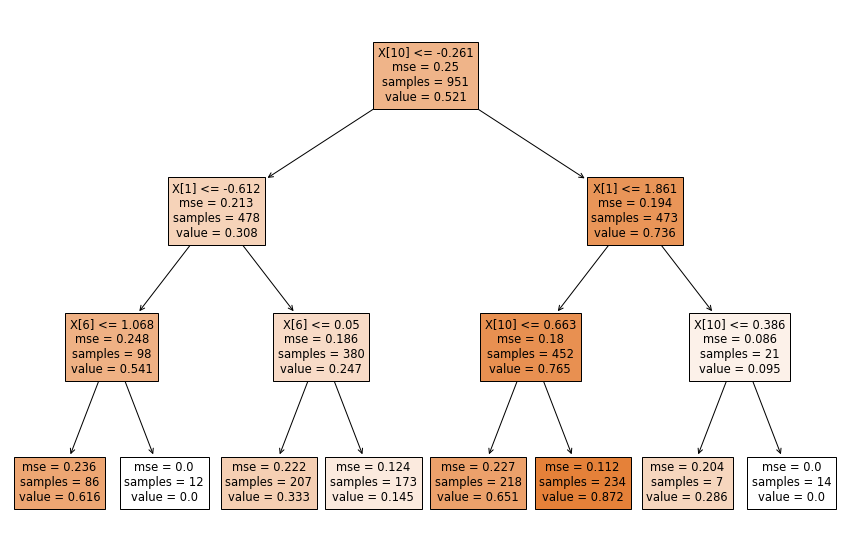

In [1098]:
#plot the decision tree for red-wine dataset
plt.figure(figsize=(15,10))
tree.plot_tree(decisionTreeRegressor,filled=True)

In [1099]:
#Division of tree shown in the form of text.
print(tree.export_text(decisionTreeRegressor))


|--- feature_10 <= -0.26
|   |--- feature_1 <= -0.61
|   |   |--- feature_6 <= 1.07
|   |   |   |--- value: [0.62]
|   |   |--- feature_6 >  1.07
|   |   |   |--- value: [0.00]
|   |--- feature_1 >  -0.61
|   |   |--- feature_6 <= 0.05
|   |   |   |--- value: [0.33]
|   |   |--- feature_6 >  0.05
|   |   |   |--- value: [0.14]
|--- feature_10 >  -0.26
|   |--- feature_1 <= 1.86
|   |   |--- feature_10 <= 0.66
|   |   |   |--- value: [0.65]
|   |   |--- feature_10 >  0.66
|   |   |   |--- value: [0.87]
|   |--- feature_1 >  1.86
|   |   |--- feature_10 <= 0.39
|   |   |   |--- value: [0.29]
|   |   |--- feature_10 >  0.39
|   |   |   |--- value: [0.00]



# Red-wine Classification

In [1100]:
#create a decision tree classification model using the training dataset.
decisionTreeClassifier=tree.DecisionTreeClassifier()
DTClsModel=decisionTreeClassifier.fit(X_train,y_train)


In [1101]:
#Test the model with the test dataset for predictions(without the labels).
DTClass_predictions=DTClsModel.predict(X_test)
DTClass_predictions

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [1102]:
#check the probability of predicted labels.
DTClsModel.predict_proba(X_test)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [1103]:
#Check the accuracy of decision tree classifier before fine tuning.
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, DTClass_predictions)
print(f'The accuracy  of decision tree classification for red-wine quality prediction is {round((accuracy_score*100),2)}%')

The accuracy  of decision tree classification for red-wine quality prediction is 70.59%


In [1104]:
#hyper parameter tuning for a better accuracy of our decision tree model.
parameter_dist={'criterion':['gini','entropy'], 
                'max_depth':[1,2,3,4,5,6,7,None]}


In [1105]:
#one of the method use for fine tyning the alforithm
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(decisionTreeClassifier,param_grid=parameter_dist,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [1106]:
#determine best parameter values of a decision tree
grid.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1107]:
#determine the best accuracy score
print(f'The score is: {round((grid.best_score_*100),2)}%')


The score is: 72.87%


In [1108]:
#determine the best parameters for fine tuning
grid.best_params_


{'criterion': 'entropy', 'max_depth': 5}

In [1109]:
#hyper tuning the parameters and training the model:
decisionTreeClassifier = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
DTClsModel = decisionTreeClassifier.fit(X_train, y_train)
DTClsModel


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1110]:
#Test the model with the test dataset for predictions (without the labels).
DTClass_predictions=DTClsModel.predict(X_test)
DTClass_predictions


array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [1111]:
#check the probability of predicted labels.
DTClsModel.predict_proba(X_test)

array([[0.50537634, 0.49462366],
       [0.18644068, 0.81355932],
       [0.02197802, 0.97802198],
       [0.91666667, 0.08333333],
       [0.76754386, 0.23245614],
       [0.76754386, 0.23245614],
       [1.        , 0.        ],
       [0.02197802, 0.97802198],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.02197802, 0.97802198],
       [0.50537634, 0.49462366],
       [0.50537634, 0.49462366],
       [0.50537634, 0.49462366],
       [0.18644068, 0.81355932],
       [0.76754386, 0.23245614],
       [0.30794702, 0.69205298],
       [0.76754386, 0.23245614],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.02197802, 0.97802198],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.02197802, 0.97802198],
       [0.30794702, 0.69205298],
       [0.30794702, 0.69205298],
       [0.

In [1112]:
#Check the accuracy of decision tree classifier post fine tuning.
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, DTClass_predictions)
print(f'The accuracy  of decision tree classification for red-wine quality prediction is {round((accuracy_score*100),2)}%')


The accuracy  of decision tree classification for red-wine quality prediction is 70.1%


In [1113]:
#Check the precision score of decision tree classifier.
from sklearn.metrics import precision_score
precision_score=precision_score(y_test, DTClass_predictions)
print(f'The precision score of decision tree classification for red-wine quality prediction is {round((precision_score*100),2)}%')


The precision score of decision tree classification for red-wine quality prediction is 75.5%


In [1114]:
#Check the recall score of decision tree classifier.
from sklearn.metrics import recall_score
recall_score=recall_score(y_test, DTClass_predictions)
print(f'The recall score  of decision tree classification for red-wine quality prediction is {round((recall_score*100),2)}%')


The recall score  of decision tree classification for red-wine quality prediction is 67.41%


In [1115]:
#Check the F1-score of decision tree classifier.
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, DTClass_predictions)
print(f'The f1-score of decision tree classification for red-wine quality prediction is {round((f1_score*100),2)}%')

The f1-score of decision tree classification for red-wine quality prediction is 71.23%


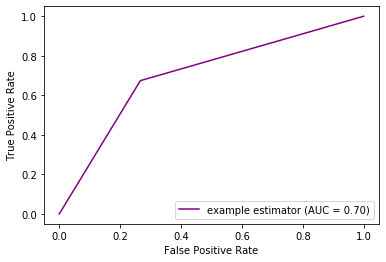

In [1116]:
# Determine the ROC curve.
import matplotlib.pyplot as plt  
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, DTClass_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot(color='purple')  
plt.show()   


In [1117]:
# Plot the precision-recall curve.

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, DTClass_predictions)
print('The Average precision-recall score is {0:0.2f}%'.format(round((average_precision*100),2)))


The Average precision-recall score is 68.79%


Text(0.5, 1.0, 'The Precision-Recall curve: AP=68.79%')

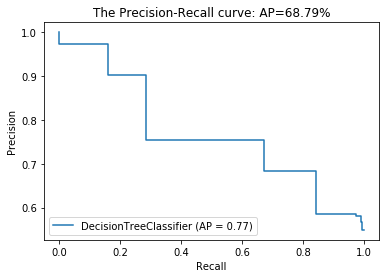

In [1118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
display = plot_precision_recall_curve(DTClsModel, X_test, y_test)
display.ax_.set_title('The Precision-Recall curve: ''AP={0:0.2f}%'.format(round((average_precision*100),2)))

In [1119]:
# determine Receiver Operating Characteristic Curve (ROC AUC) score.
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, DTClass_predictions)
print('The Receiver Operating Characteristic Curve (ROC AUC) score is {0:0.2f}%'.format(((roc_auc_score*100))))

The Receiver Operating Characteristic Curve (ROC AUC) score is 70.39%


In [1120]:
#determine the classifcation report.
from sklearn.metrics import classification_report
print(classification_report(y_test, DTClass_predictions))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       184
           1       0.76      0.67      0.71       224

    accuracy                           0.70       408
   macro avg       0.70      0.70      0.70       408
weighted avg       0.71      0.70      0.70       408



In [1121]:
#build the confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, DTClass_predictions)


array([[135,  49],
       [ 73, 151]], dtype=int64)

[[135  49]
 [ 73 151]]


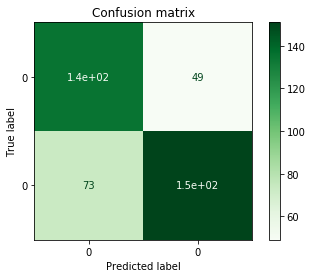

In [1122]:
#plot the confusion metrics
display = plot_confusion_matrix(DTClsModel, X_test, y_test,display_labels=y,cmap=plt.cm.Greens)
display.ax_.set_title('Confusion matrix')
print(display.confusion_matrix)

[Text(418.5, 475.65000000000003, 'X[10] <= -0.261\nentropy = 0.999\nsamples = 951\nvalue = [456, 495]'),
 Text(209.25, 339.75, 'X[6] <= 1.547\nentropy = 0.89\nsamples = 478\nvalue = [331, 147]'),
 Text(104.625, 203.85000000000002, 'X[1] <= 0.099\nentropy = 0.934\nsamples = 414\nvalue = [269, 145]'),
 Text(52.3125, 67.94999999999999, 'entropy = 1.0\nsamples = 186\nvalue = [94, 92]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.782\nsamples = 228\nvalue = [175, 53]'),
 Text(313.875, 203.85000000000002, 'X[9] <= -0.666\nentropy = 0.201\nsamples = 64\nvalue = [62, 2]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.414\nsamples = 24\nvalue = [22, 2]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(627.75, 339.75, 'X[10] <= 1.033\nentropy = 0.833\nsamples = 473\nvalue = [125, 348]'),
 Text(523.125, 203.85000000000002, 'X[1] <= 1.834\nentropy = 0.931\nsamples = 323\nvalue = [112, 211]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.891\nsa

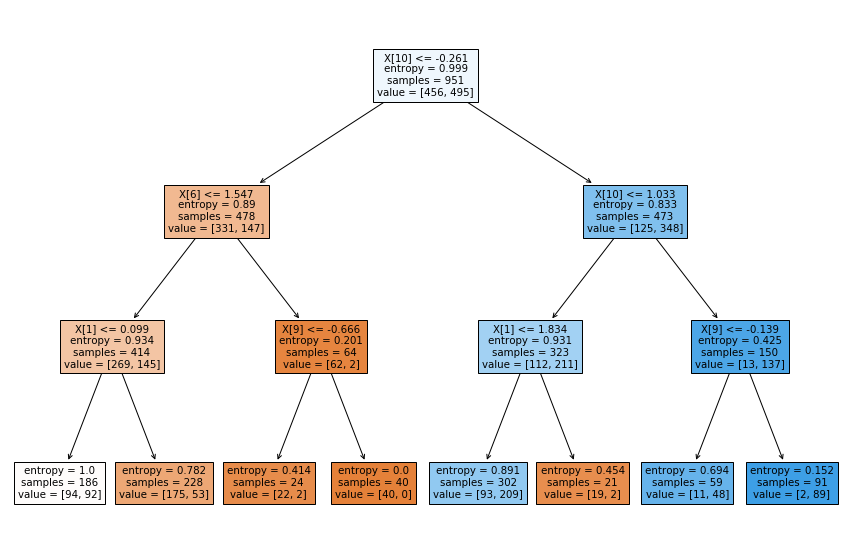

In [1123]:
#plot the decision tree for red-wine dataset
plt.figure(figsize=(15,10))
tree.plot_tree(decisionTreeClassifier,filled=True)

In [1124]:
#Division of tree shown in the form of text.
print(tree.export_text(decisionTreeClassifier))

|--- feature_10 <= -0.26
|   |--- feature_6 <= 1.55
|   |   |--- feature_1 <= 0.10
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.10
|   |   |   |--- class: 0
|   |--- feature_6 >  1.55
|   |   |--- feature_9 <= -0.67
|   |   |   |--- class: 0
|   |   |--- feature_9 >  -0.67
|   |   |   |--- class: 0
|--- feature_10 >  -0.26
|   |--- feature_10 <= 1.03
|   |   |--- feature_1 <= 1.83
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.83
|   |   |   |--- class: 0
|   |--- feature_10 >  1.03
|   |   |--- feature_9 <= -0.14
|   |   |   |--- class: 1
|   |   |--- feature_9 >  -0.14
|   |   |   |--- class: 1

